In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
happy = pd.read_csv("data/Happiness.csv")
nutrition = pd.read_csv("data/nutrition_data.csv")[:96131]  # 2019 only to match timescale of happiness data

nutrition_final = nutrition.copy()

nutrition_final.loc[nutrition["Country Name"] == "Russian Federation", "Country Name"] = "Russia"
nutrition_final.loc[nutrition["Country Name"] == "Czechia", "Country Name"] = "Czech Republic"
nutrition_final.loc[nutrition["Country Name"] == "Trinidad and Tobago", "Country Name"] = "Trinidad & Tobago"
nutrition_final.loc[nutrition["Country Name"] == "Hong Kong SAR, China", "Country Name"] = "Hong Kong"
nutrition_final.loc[nutrition["Country Name"] == "Cote d'Ivoire", "Country Name"] = "Ivory Coast"
nutrition_final.loc[nutrition["Country Name"] == "Congo, Rep.", "Country Name"] = "Congo (Brazzaville)"
nutrition_final.loc[nutrition["Country Name"] == "Congo, Dem. Rep.", "Country Name"] = "Congo (Kinshasa)"
nutrition_final.loc[nutrition["Country Name"] == "Lao PDR", "Country Name"] = "Laos"
nutrition_final.loc[nutrition["Country Name"] == "Iran, Islamic Rep.", "Country Name"] = "Iran"
nutrition_final.loc[nutrition["Country Name"] == "Kyrgyz Republic", "Country Name"] = "Kyrgyzstan"
nutrition_final.loc[nutrition["Country Name"] == "Slovak Republic", "Country Name"] = "Slovakia"
nutrition_final.loc[nutrition["Country Name"] == "Turkiye", "Country Name"] = "Turkey"
nutrition_final.loc[nutrition["Country Name"] == "Venezuela, RB", "Country Name"] = "Venezuela"
nutrition_final.loc[nutrition["Country Name"] == "Egypt, Arab Rep.", "Country Name"] = "Egypt"
nutrition_final.loc[nutrition["Country Name"] == "Syrian Arab Republic", "Country Name"] = "Syria"
nutrition_final.loc[nutrition["Country Name"] == "Yemen, Rep.", "Country Name"] = "Yemen"
nutrition_final.loc[nutrition["Country Name"] == "West Bank and Gaza", "Country Name"] = "Palestinian Territories"
nutrition_final.loc[nutrition["Country Name"] == "Korea, Rep.", "Country Name"] = "South Korea"
nutrition_final.loc[nutrition["Country Name"] == "Gambia, The", "Country Name"] = "Gambia"
nutrition_final.loc[nutrition["Country Name"] == "Eswatini", "Country Name"] = "Swaziland"

In [3]:
nutrition_wide = nutrition_final.pivot(index = "Country Name", 
                                 columns = "Series Name", 
                                 values = "2019 [YR2019]")

In [4]:
happy_merged = pd.merge(happy, nutrition_wide, how = "inner", right_on = "Country Name", left_on = "Country or region") # excluded Taiwan and Northern Cyprus

In [5]:
test = happy_merged.replace('..', np.nan)
test["Prevalence of undernourishment (percent of population)"] = pd.to_numeric(test["Prevalence of undernourishment (% of population)"])
test["Prevalence of HIV, total (percent of population ages 15-49)"] = pd.to_numeric(test["Prevalence of HIV, total (% of population ages 15-49)"])
test["Net migration"] = pd.to_numeric(test["Net migration"])
test["Current health expenditure per capita, PPP (current international $)"] = pd.to_numeric(test["Current health expenditure per capita, PPP (current international $)"])

test.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,AIDS estimated deaths (UNAIDS estimates),...,Urban poverty headcount ratio at national poverty lines (% of urban population),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV,Prevalence of undernourishment (percent of population),"Prevalence of HIV, total (percent of population ages 15-49)"
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,26.6,NaN,2.5,NaN
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,100,...,NaN,NaN,NaN,NaN,NaN,NaN,25.9,100,2.5,0.1
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,100,...,NaN,NaN,NaN,NaN,NaN,NaN,31.6,100,2.5,0.1
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100,...,NaN,NaN,NaN,NaN,NaN,NaN,30.5,100,2.5,0.1
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,100,...,NaN,NaN,NaN,NaN,NaN,NaN,18.5,100,2.5,0.2


<AxesSubplot:xlabel='Prevalence of undernourishment (percent of population)', ylabel='Count'>

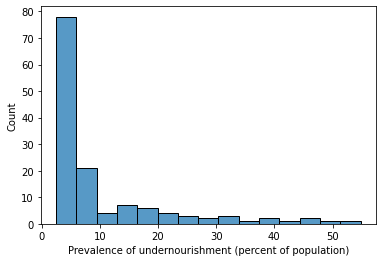

In [6]:
sns.histplot(data = test, x = "Prevalence of undernourishment (percent of population)")

<AxesSubplot:xlabel='Prevalence of HIV, total (percent of population ages 15-49)', ylabel='Count'>

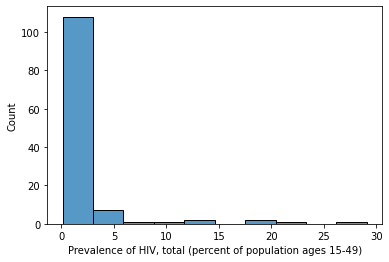

In [7]:
sns.histplot(data = test, x = "Prevalence of HIV, total (percent of population ages 15-49)", bins = 10)

<AxesSubplot:xlabel='Current health expenditure per capita, PPP (current international $)', ylabel='Count'>

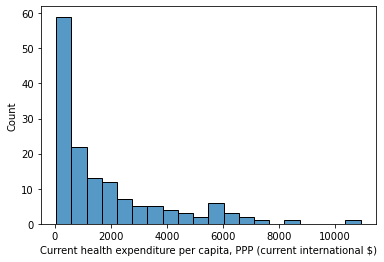

In [8]:
sns.histplot(data = test, x = "Current health expenditure per capita, PPP (current international $)", bins = 20)

<AxesSubplot:xlabel='Net migration', ylabel='Count'>

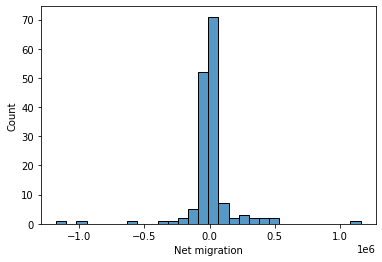

In [9]:
sns.histplot(data = test, x = "Net migration", bins = 30)

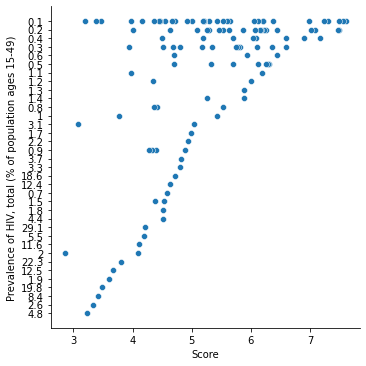

In [10]:
sns.relplot(x = "Score", y = "Prevalence of HIV, total (% of population ages 15-49)", data = test)

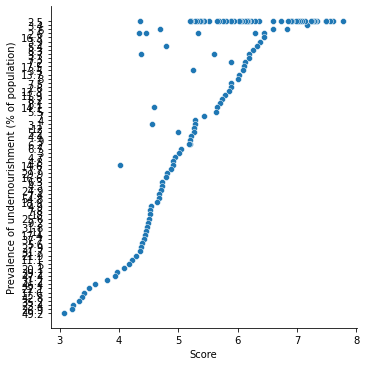

In [11]:
sns.relplot(x = "Score", y = "Prevalence of undernourishment (% of population)", data = test)

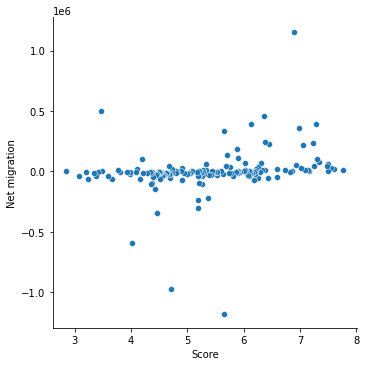

In [12]:
sns.relplot(x = "Score", y = "Net migration", data = test)  # Initially does not look like there is much of a relationship

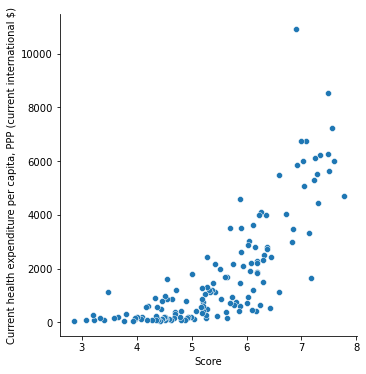

In [13]:
sns.relplot(x = "Score", y = "Current health expenditure per capita, PPP (current international $)", data = test)

In [14]:
"""
We will attempt to data mine information from the variables.

Thus, we will not be train/test splitting nor standardizing data or using 
regularization methods, for now.
"""
X = test[["Country or region",
          "Current health expenditure per capita, PPP (current international $)",
          "Prevalence of undernourishment (percent of population)",
          "Net migration",
          "Prevalence of HIV, total (percent of population ages 15-49)"]]
y = test[["Score"]]


X[X["Prevalence of HIV, total (percent of population ages 15-49)"].isna()]

,Country or region,"Current health expenditure per capita, PPP (current international $)",Prevalence of undernourishment (percent of population),Net migration,"Prevalence of HIV, total (percent of population ages 15-49)"
0,Finland,4710.218262,2.5,15558,NaN
6,Sweden,6222.659180,2.5,81585,NaN
8,Canada,5520.651367,2.5,391914,NaN
9,Austria,6134.131348,2.5,41105,NaN
12,Israel,3326.252930,2.5,16132,NaN
14,United Kingdom,5087.381348,2.5,221179,NaN
17,Belgium,5846.896484,2.5,54395,NaN
19,Czech Republic,3477.025879,2.5,4030,NaN
20,United Arab Emirates,2996.363281,6.0,-4466,NaN
21,Malta,4039.614990,2.5,11247,NaN


One of the first big challenges we run into is missing data. Given the extremely limited amount of observations we have (155), it would be foolish to drop rows with missing entries. Instead, we can use a variation of monte carlo simulation from module 3. Specifically, we will use Markov Chain Monte Carlo (MCMC) to impute missing entries from a multivariate normal distribution. This will undoubtedly give us the most accurate values for missing data and perform better than mean replacement/row dropping.

In [15]:
lm = LinearRegression()
print(X.head())
lm.fit(X, y)
lm.coef_

NameError: name 'LinearRegression' is not defined